# SentimentAnalysis
## Naive Bayes
### [ Opiniones VS Atracciones ]
#### Ing. Luis Felipe Narvaez Gomez. E-mail: luis.narvaez@usantoto.edu.co. Cod: 2312660. Facultad de Ingenieria de Sistemas. USTA.

### Importar Librerias

In [1]:
# Librerias DataFrame
import numpy as np
import pandas as pd
import re

In [2]:
# Librerias Graficos e imagenes
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

In [3]:
# Importar STOPWORDS
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# Vectorizar
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to C:\Users\Ruiso Local
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Datos de Clasificacion
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
# Exportar data
import pickle

### Leer un archivo XLSX

In [6]:
# Leer el archivo de tipo XLSX
dfData = pd.read_excel("Rest_Mex_2022_Sentiment_Analysis_Track_Train.xlsx")

Transformemos el DataFrame para que Attraction sean numeros y no letras

In [7]:
dfData.groupby('Attraction').size()

Attraction
Attractive     5197
Hotel         16565
Restaurant     8450
dtype: int64

In [8]:
df_new = dfData.copy()

In [9]:
df_new['Attraction_new'] = df_new['Attraction'].replace('Attractive',1).replace('Hotel',2).replace('Restaurant',3)

In [10]:
df_new.keys()

Index(['Title', 'Opinion', 'Polarity', 'Attraction', 'Attraction_new'], dtype='object')

In [11]:
df_new.head(5)

,Title,Opinion,Polarity,Attraction,Attraction_new
0,Pésimo lugar,Piensen dos veces antes de ir a este hotel te ...,1,Hotel,2
1,No vayas a lugar de Eddie,Cuatro de nosotros fuimos recientemente a Eddi...,1,Restaurant,3
2,Mala relación calidad-precio,seguiré corta y simple: limpieza\n- bad. Tengo...,1,Hotel,2
3,Minusválido? ¡No te alojes aquí!,Al reservar un hotel con multipropiedad Mayan ...,1,Hotel,2
4,Es una porqueria no pierdan su tiempo,No pierdan su tiempo ni dinero venimos porque ...,1,Hotel,2


In [12]:
df_new.drop(['Attraction'], axis=1, inplace=True)

In [13]:
df_new.head(3)

,Title,Opinion,Polarity,Attraction_new
0,Pésimo lugar,Piensen dos veces antes de ir a este hotel te ...,1,2
1,No vayas a lugar de Eddie,Cuatro de nosotros fuimos recientemente a Eddi...,1,3
2,Mala relación calidad-precio,seguiré corta y simple: limpieza\n- bad. Tengo...,1,2


Ahora tenemos un nuevo dataframe con las siguientes variables:

1. 'Attractive' ===> 1
2. 'Hotel'===> 2
3. 'Restaurant' ===> 3

### Conociendo la Data

<AxesSubplot:xlabel='Attraction_new'>

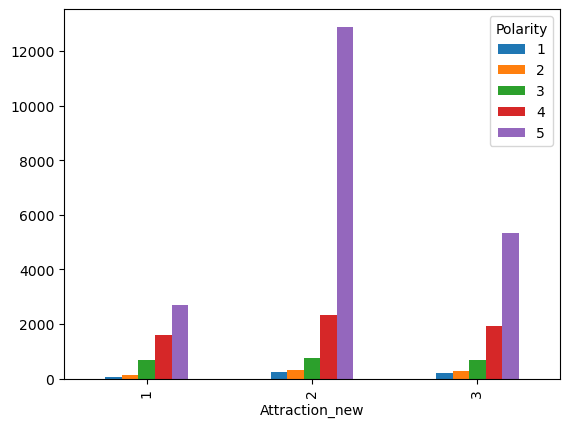

In [14]:
sentiment = df_new.groupby(['Attraction_new',
                            'Polarity']).Polarity.count().unstack()
sentiment.plot(kind="bar")

### Features y Labels

In [15]:
df_new.keys()

Index(['Title', 'Opinion', 'Polarity', 'Attraction_new'], dtype='object')

In [16]:
# [0]       [1]         [2]        [3]
# ['Title', 'Opinion', 'Polarity', 'Attraction_new']

features = df_new.iloc[:,1].values  # Opinion
labels = df_new.iloc[:,3].values    # Attraction_new

### Limpiar Dataset

In [17]:
# Limpiar el dataset de todos los caracteres especiales.
processed_features = []

for sentence in range(0, len(features)):
    #Remove all the special characters
    processed_feature = re.sub(r'\W',' ', str(features[sentence]))
    #remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    #remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    #substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    #removing prefixxed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    #converting to lowercase
    processed_feature = processed_feature.lower()
    #añadirlo al arreglo alv
    processed_features.append(processed_feature)

In [18]:
# En el anterior paso tenemos nuestra nueva 
# columna de features (Opiniones)

In [19]:
vectorizer = TfidfVectorizer (max_features=2500, 
                              min_df = 7, 
                              max_df=0.8, 
                              stop_words=stopwords.words('spanish'))

In [20]:
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [21]:
X = processed_features

In [22]:
y = labels

### Naive Bayes Classification - Gaussian

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [25]:
import random 
semilla = random.randint(0,100)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state=semilla,
                                                    stratify=y)

In [26]:
print(semilla)

43


In [27]:
clf = GaussianNB()

In [28]:
clf.fit(X_train, y_train)

GaussianNB()

In [29]:
print(clf.score(X_test, y_test))

0.8916101274201556


In [30]:
predictions = (clf.predict(X_test))

In [31]:
print(confusion_matrix(y_test, predictions))

[[ 996   29   15]
 [  79 2923  311]
 [ 144   77 1469]]


In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.82      0.96      0.88      1040
           2       0.97      0.88      0.92      3313
           3       0.82      0.87      0.84      1690

    accuracy                           0.89      6043
   macro avg       0.87      0.90      0.88      6043
weighted avg       0.90      0.89      0.89      6043



In [33]:
print(accuracy_score(y_test, predictions))

0.8916101274201556


### Naive Bayes Classification - Multinomial 

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [36]:
import random 
semilla = random.randint(0,100)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state=semilla,
                                                    stratify=y)

In [37]:
print(semilla)

53


In [38]:
clf = MultinomialNB()

In [39]:
clf.fit(X_train, y_train)

MultinomialNB()

In [40]:
print(clf.score(X_test, y_test))

0.94489491974185


In [41]:
predictions = (clf.predict(X_test))

In [42]:
print(confusion_matrix(y_test, predictions))

[[ 992   38   10]
 [   4 3281   28]
 [   4  249 1437]]


In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.99      0.95      0.97      1040
           2       0.92      0.99      0.95      3313
           3       0.97      0.85      0.91      1690

    accuracy                           0.94      6043
   macro avg       0.96      0.93      0.94      6043
weighted avg       0.95      0.94      0.94      6043



In [44]:
print(accuracy_score(y_test, predictions))

0.94489491974185
